In [5]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [6]:
import os
os.chdir('F:\dataset')

In [8]:
df=pd.read_csv('Admission_prediction.csv')

In [9]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [10]:
df.shape

(500, 9)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Serial No.           500 non-null int64
GRE Score            485 non-null float64
TOEFL Score          490 non-null float64
University Rating    485 non-null float64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


In [14]:
df.isnull().sum()

Serial No.            0
GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [15]:
df['GRE Score'].mode()

0    312.0
1    324.0
dtype: float64

In [16]:
df['GRE Score'].fillna(df['GRE Score'].mode()[0],inplace=True)

In [17]:
df['TOEFL Score'].mode()

0    110.0
dtype: float64

In [18]:
df['TOEFL Score'].fillna(df['TOEFL Score'].mode()[0],inplace=True)

In [19]:
df['University Rating'].mean()

3.1216494845360825

In [20]:
df['University Rating'].fillna(df['University Rating'].mean(),inplace=True)

In [21]:
df['GRE Score'].head()

0    337.0
1    324.0
2    312.0
3    322.0
4    314.0
Name: GRE Score, dtype: float64

In [23]:
df.head(2)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76


In [24]:
x=df.drop(['Serial No.','Chance of Admit'],axis=1)
y=df['Chance of Admit']

In [27]:
x.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337.0,118.0,4.0,4.5,4.5,9.65,1
1,324.0,107.0,4.0,4.0,4.5,8.87,1
2,312.0,104.0,3.0,3.0,3.5,8.00,1
3,322.0,110.0,3.0,3.5,2.5,8.67,1
4,314.0,103.0,2.0,2.0,3.0,8.21,0


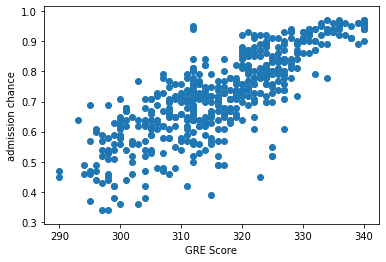

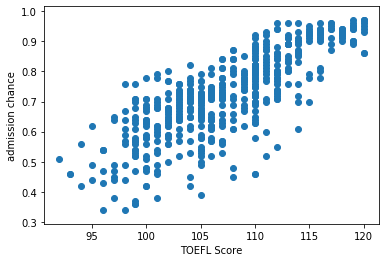

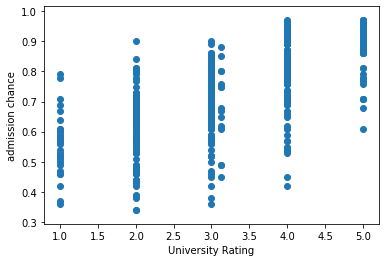

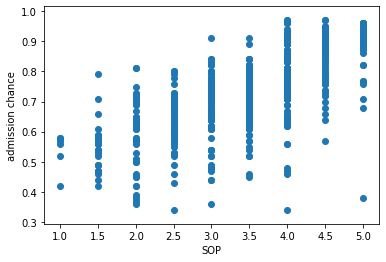

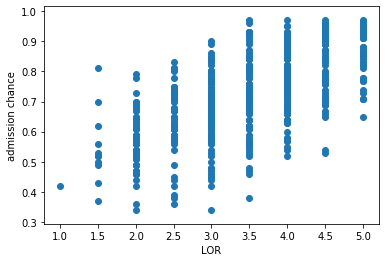

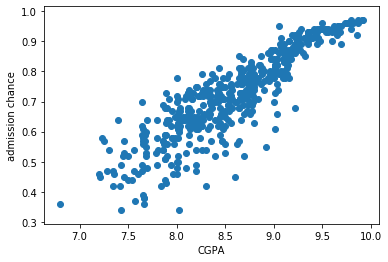

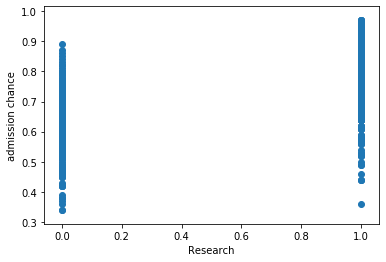

In [33]:
for col in x.columns:
    plt.scatter(x[col],y)
    plt.xlabel(col)
    plt.ylabel('admission chance')
    plt.show()

In [34]:
# To be only used if you want to scale the data
from sklearn.preprocessing import StandardScaler
scaler_feature=StandardScaler()
scaler_label=StandardScaler()
scaled_data=scaler_feature.fit_transform(x)
scaled_data


array([[ 1.85052822,  1.77547686,  0.77890565, ...,  1.09894429,
         1.77680627,  0.88640526],
       [ 0.68147064, -0.04027672,  0.77890565, ...,  1.09894429,
         0.48585943,  0.88640526],
       [-0.39765943, -0.53548224, -0.1078766 , ...,  0.01730621,
        -0.95404281,  0.88640526],
       ...,
       [ 1.22103568,  2.10561387,  1.66568791, ...,  1.63976333,
         1.62785086,  0.88640526],
       [-0.39765943, -0.70055074,  0.77890565, ...,  1.63976333,
        -0.24236699, -1.12815215],
       [ 0.95125316,  0.95013432,  0.77890565, ...,  1.09894429,
         0.76721964, -1.12815215]])

In [35]:
# Splitting the data into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=100)

In [37]:
# Fitting the data into the linear regression model
from sklearn import linear_model
model=linear_model.LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
predictions=model.predict(x_test)

In [49]:
# Calculating the accuracy of model
from sklearn.metrics import r2_score
r2_score(predictions,y_test)

0.8076993525686706